<a href="https://colab.research.google.com/github/Pravallika-Myneni/Wavetowebhack_wavecoders/blob/main/Wave2WebHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/wri/ReservoirWatchHack.git

Cloning into 'ReservoirWatchHack'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 5), reused 37 (delta 2), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [ ]:
data=pd.read_csv('/content/ReservoirWatchHack/Data/CWC_WaterLevels/Harangi.csv')
data.sample(4)

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
2473,33080,Harangi,2015,7,2015-02-17,1.05,2796.16,37,0,HARANGI-2015-02-17
1592,21654,Harangi,2019,26,2019-06-28,1.68,2807.49,194,50,HARANGI-2019-06-28
381,4935,Harangi,2014,3,2014-01-16,1.42,2803.66,102,0,HARANGI-2014-01-16
1148,15893,Harangi,2018,14,2018-04-03,1.72,2808.17,110,70,HARANGI-2018-04-03


In [ ]:
data.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,37,Harangi,2011,1,2011-01-01,3.74,2835.90,142,0,HARANGI-2011-01-01
1,38,Harangi,2011,1,2011-01-02,3.76,2836.09,239,0,HARANGI-2011-01-02
2,39,Harangi,2011,1,2011-01-03,3.77,2836.22,166,0,HARANGI-2011-01-03
3,40,Harangi,2011,1,2011-01-04,3.78,2836.31,118,0,HARANGI-2011-01-04
4,41,Harangi,2011,1,2011-01-05,3.79,2836.41,130,0,HARANGI-2011-01-05


In [ ]:
data.shape

(3321, 10)

In [ ]:
print(sorted(set(data['YEAR'])))
print(len(set(data['YEAR'])))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3321 non-null   int64  
 1   RESERVOIR            3321 non-null   object 
 2   YEAR                 3321 non-null   int64  
 3   WEEK_NO              3321 non-null   int64  
 4   FLOW_DATE            3321 non-null   object 
 5   PRESENT_STORAGE_TMC  3321 non-null   float64
 6   RES_LEVEL_FT         3321 non-null   object 
 7   INFLOW_CUSECS        3321 non-null   object 
 8   OUTFLOW_CUECS        3321 non-null   object 
 9   UNIQUE_KEY           3321 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 259.6+ KB


In [ ]:
data['FLOW_DATE'] = pd.to_datetime(data['FLOW_DATE'])

In [ ]:
data_i = data.set_index('FLOW_DATE')
data_i.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
FLOW_DATE,,,,,,,,,
2011-01-01,37,Harangi,2011,1,3.74,2835.90,142,0,HARANGI-2011-01-01
2011-01-02,38,Harangi,2011,1,3.76,2836.09,239,0,HARANGI-2011-01-02
2011-01-03,39,Harangi,2011,1,3.77,2836.22,166,0,HARANGI-2011-01-03
2011-01-04,40,Harangi,2011,1,3.78,2836.31,118,0,HARANGI-2011-01-04
2011-01-05,41,Harangi,2011,1,3.79,2836.41,130,0,HARANGI-2011-01-05


In [ ]:
df=data_i['PRESENT_STORAGE_TMC']
#df.index
df.head()

FLOW_DATE
2011-01-01    3.74
2011-01-02    3.76
2011-01-03    3.77
2011-01-04    3.78
2011-01-05    3.79
Name: PRESENT_STORAGE_TMC, dtype: float64

Text(0, 0.5, 'PRESENT_STORAGE_TMC')

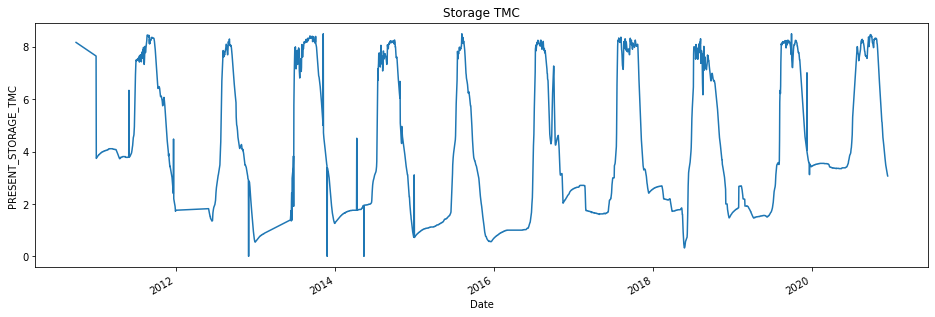

In [ ]:
ax = df.plot(figsize=(16,5), title='Storage TMC')
ax.set_xlabel("Date")
ax.set_ylabel('PRESENT_STORAGE_TMC')

In [ ]:
additive = seasonal_decompose(df,freq=52, model='additive',extrapolate_trend='freq')

In [ ]:
additive_df = pd.concat([additive.seasonal, additive.trend, additive.resid, additive.observed], axis=1)
additive_df.columns = ['seasonal', 'trend', 'resid', 'actual_values']
additive_df.head()

,seasonal,trend,resid,actual_values
FLOW_DATE,,,,
2011-01-01,-0.018281,3.925503,-0.167222,3.74
2011-01-02,-0.028852,3.927839,-0.138986,3.76
2011-01-03,-0.059242,3.930175,-0.100933,3.77
2011-01-04,-0.092261,3.932511,-0.060250,3.78
2011-01-05,-0.099940,3.934847,-0.044907,3.79


Text(0.5, 0.98, 'Additive Decompose')

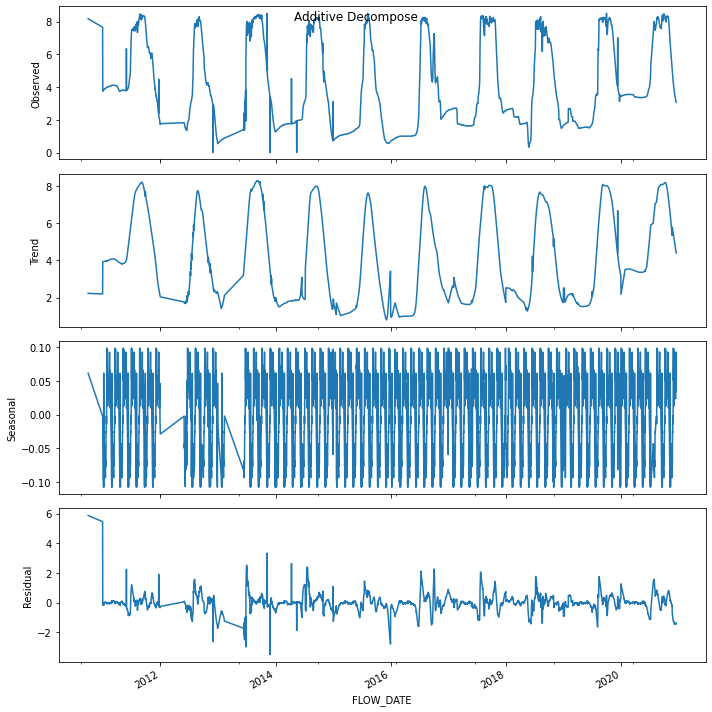

In [ ]:
plt.rcParams.update({'figure.figsize': (10,10)})
additive.plot().suptitle('Additive Decompose')

In [ ]:
trend = additive.trend

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(trend.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.572490
p-value: 0.000000


Text(0.5, 0.98, '2nd Order Differencing')

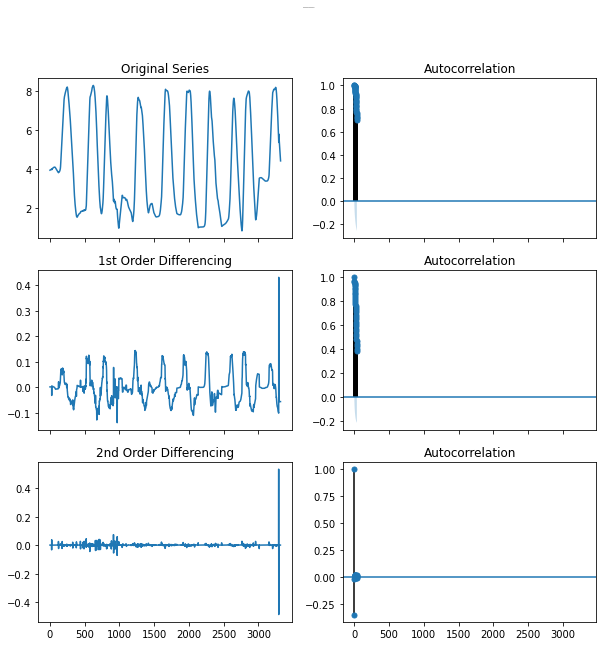

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(trend.values); axes[0, 0].set_title('Original Series')
plot_acf(trend.values, ax=axes[0, 1]).suptitle('Original Series', fontsize=0)
# 1st Differencing
diff1 = trend.diff().dropna()
axes[1, 0].plot(diff1.values)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1.values, ax=axes[1, 1]).suptitle('1st Order Differencing', fontsize=0)
# 2nd Differencing
diff2 = trend.diff().diff().dropna()
axes[2, 0].plot(diff2.values)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2.values, ax=axes[2, 1]).suptitle('2nd Order Differencing', fontsize=0)

Text(0.5, 0.98, '1st Order Differencing')

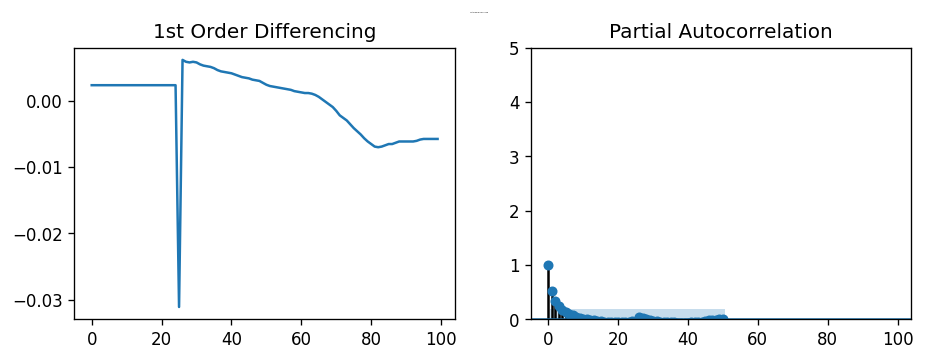

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
size = 100
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1.values[:size])
axes[0].set_title('1st Order Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(diff1.values[:size], lags=50, ax=axes[1]).suptitle('1st Order Differencing', fontsize=0)

Text(0.5, 0.98, '1st Order Differencing')

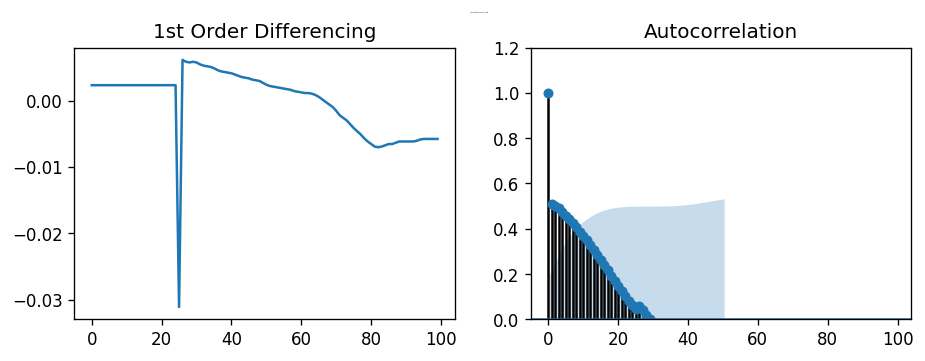

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
size = 100
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff1.values[:size])
axes[0].set_title('1st Order Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(diff1.values[:size], lags=50, ax=axes[1]).suptitle('1st Order Differencing', fontsize=0)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
train = trend[:3000]
test  = trend[3000:]
# order = (p=1, d=1, q=1)
model = ARIMA(train, order=(1, 1, 1))  
model = model.fit(disp=0)  
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               ARIMA Model Results                               
Dep. Variable:     D.PRESENT_STORAGE_TMC   No. Observations:                 2999
Model:                    ARIMA(1, 1, 1)   Log Likelihood               11627.402
Method:                          css-mle   S.D. of innovations              0.005
Date:                   Wed, 05 May 2021   AIC                         -23246.804
Time:                           12:28:57   BIC                         -23222.780
Sample:                                1   HQIC                        -23238.162
                                                                                 
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0011      0.013      0.085      0.932      -0.024       0.027
ar.L1.D.PRESENT_STORAGE_TMC     0.9883      0.003    361

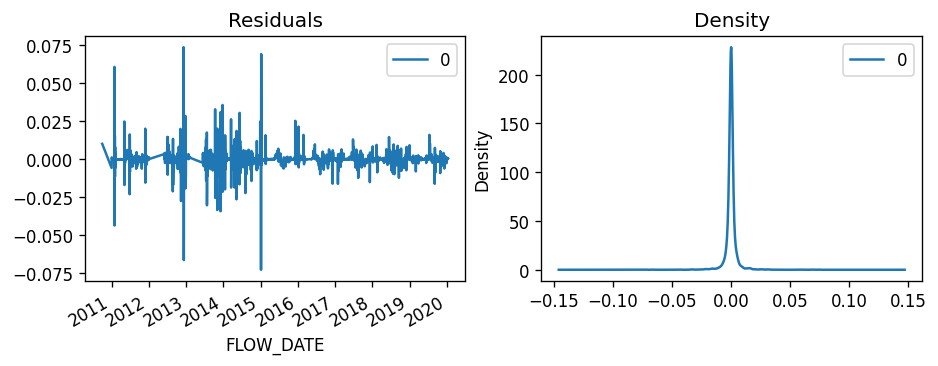

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

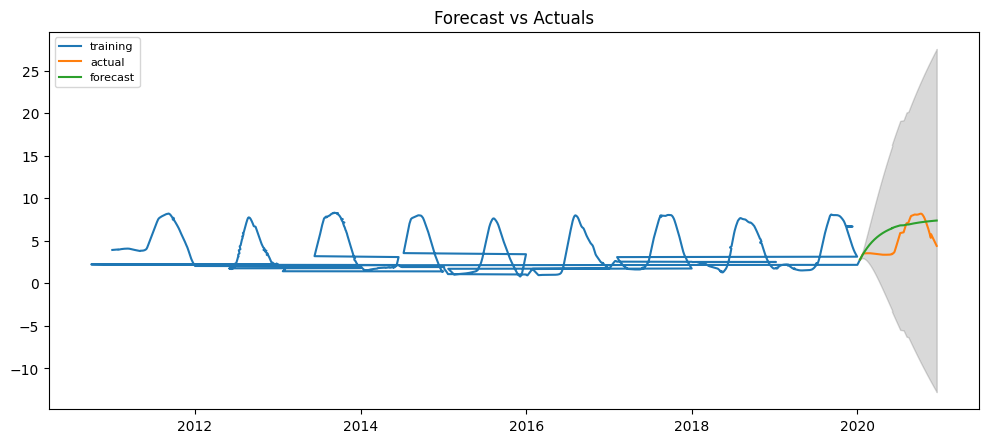

In [ ]:
# Forecast: 321 forecasting values with 95% confidence
fc, se, conf = model.forecast(321, alpha=0.05)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)